# Theoretical Framework

### Problem Justification

The education statistics dataset from Kaggle (https://www.kaggle.com/datasets/theworldbank/education-statistics/data) is an important resource for building a composite index. This index will help to evaluate and make comparisons between education systems in different countries. With this dataset, I aim to create a composite index that gives a complete picture of the many educational indicators, which will allow for better informed decision making within the field of education.

I have selected this problem because it is very important to understand how efficient educational systems are operating across the world. Education is a basic part of societal growth, influencing economies and personal welfare. Therefore, evaluating the performance of educational systems through a composite index is crucial for recognizing strong points, shortcomings and parts where enhancement is needed.

### Appropriateness of Data

The data from the World Bank's education statistics set on Kaggle is very suitable for building the composite index. It provides a broad selection of educational indicators over many years and across numerous countries. The dataset includes indicators that cover different aspects of the education system like rates of enrollment, literacy, transition as well as compulsory education's duration which guarantees a complete evaluation.

The dataset comes from reliable sources such as World Bank, ensuring reliability and credibility.

### Sub-Indices Composition

The composite index will be built from sub-indices, where each one shows a particular dimension of the education system as laid out in the dataset. These sub-indices are:

1. **Primary Education Enrollment**: This sub-index shows the rates of enrollment in primary education, which tells us about how easy it is for people to get into and be included in primary school.

2. **Secondary Education Enrollment**: This sub-index is centered on secondary education and looks into the rates of enrollment at this level, showing how students are advancing from primary to secondary education.

3. **Pre-Primary Population**: It measures the group of individuals falling under the age range for pre-primary education, which helps to evaluate how far and wide early childhood education programs extend.

4. **Primary Population**: This sub-index shows the population who are in the age range for primary school, emphasizing the need for primary education and educational materials to sustain it.

5. **Secondary Population**: Just like primary population, this sub-index is about the population that falls within the secondary school age group. It shows how much requirement is there for resources and places to handle secondary education.

6. **Tertiary Population**: This sub-index looks at the population that can join tertiary education, such as universities and professional schools. It shows the possible need for more chances in higher learning.

The sub-indices have been formed using different indicators from the dataset. All together, they make a complete evaluation of how well education system is performing. The composite index gives us an overall view on all aspects related to education-such as access to schooling and quality of teaching methods-used in our country's educational development and progress over time.


# Data Selection

### Source of Data

The data for this project is sourced using the education statistics dataset from World Bank available on Kaggle. This set of data gives a wide range of educational indicators over many years and includes many countries. By using this dataset, we can explore various variables that provide information about different aspects of the education system.

### Justification of Data Source

The World Bank's education statistics dataset is chosen for several reasons:

**Complete Coverage**: The dataset is complete, containing all the necessary indicators for assessing educational performance. It includes data on enrollment rates, literacy levels, transition percentages, and length of compulsory education among other important factors.

**Reliability and Credibility**: The data comes from the World Bank, which is a trustworthy international body known for its strict methods in gathering and publishing information. As a result, this dataset is dependable and credible to carry out analysis and draw understandings.

**Data Availability**: The dataset can be found in the public domain of Kaggle, which means it is freely accessible for use by researchers and analysts. This availability promotes transparency in data analysis, allowing others to easily verify the findings. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Data Structure

In [2]:
#df_country_series = pd.read_csv('datasets/EdStatsCountry-Series.csv')
#df_country = pd.read_csv('datasets/EdStatsCountry.csv')
df_data = pd.read_csv('EdStatsData.csv')
#df_foot_note = pd.read_csv('datasets/EdStatsFootNote.csv')
#df_series = pd.read_csv('datasets/EdStatsSeries.csv')

#print('df_country_series shape: ', df_country_series.shape)
#print('df_country shape: ', df_country.shape)
print('df_data shape: ', df_data.shape)
#print('df_foot_note shape: ', df_foot_note.shape)
#print('df_series shape: ', df_series.shape)

df_data shape:  (886930, 70)


The datasets is structured as:

* **df_country_series** This dataset provides details about various indicators estimated for specific countries.
* **df_country** This dataset includes a  list of all countries involved (total of 241)
* **df_data** This dataset has details for every country and indicator, summing up to 3665 unique indicators. It also has measurement values for these indicators from the years 1970 to 2017 along with predictions that go further into future until 2100.
* **df_foot_note** This dataset shows the uncertainty and origin of the data series for the indicators in every single year.
* **df_series** This dataset shows a complete list of all indicators, showing their category groupings and additional information that is relevant.

In [3]:
df_data.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

# Imputation of Missing Data

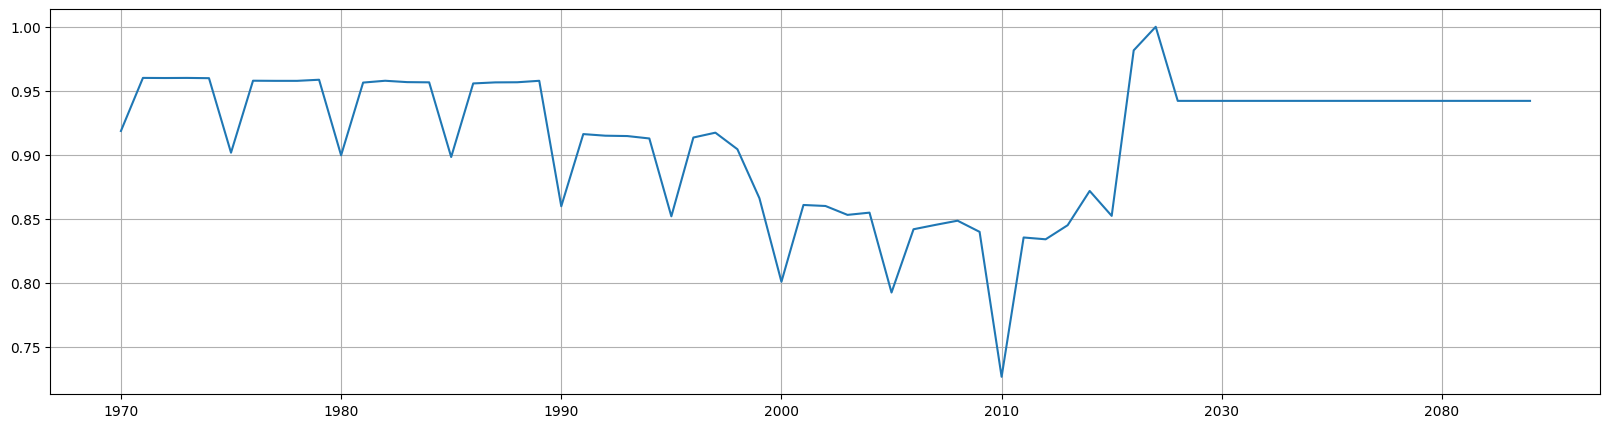

In [5]:
# Check for missing values
# Extracting indicator years from the dataset
indicator_years = df_data.iloc[:, 4:-1]

# Setting the index using indicator codes
indicator_years.index = df_data.iloc[:, 3].values

# Plotting the percentage of missing values over the years
indicator_years.isnull().mean().plot(figsize=(20,5), grid=True);


# Getting necessary data for the analysis

In [6]:
#List of countries that have been selected for analysis.
country=["Ireland","France","Spain","Portugal","Germany","Brazil"]

# List of selected indicators for analysis
# Educational Access and Enrollment
code_list = [
    "SE.PRM.ENRL",
    "SE.SEC.ENRL",
    "SP.PRE.TOTL.IN",
    "SP.PRM.TOTL.IN",
    "SP.SEC.TOTL.IN",
    "SP.TER.TOTL.IN"
]

Indicator_Name = [
    "Enrolment in primary education, both sexes (number)",
    "Enrolment in secondary education, both sexes (number)",
    "Population of the official age for pre-primary education, both sexes (number)",
    "Population of the official age for primary education, both sexes (number)",
    "Population of the official age for secondary education, both sexes (number)",
    "Population of the official age for tertiary education, both sexes (number)"
]
     

In [7]:
df=df_data[['Indicator Code', 'Country Name']].iloc[0:]

df2=df_data.iloc[0:,25:65] 

add_df=[df,df2] 

# Adding all values to single DataFrame
final_df=pd.concat(add_df,axis=1)

#printing the dataframe
final_df

,Indicator Code,Country Name,1991,1992,1993,1994,1995,1996,1997,1998,...,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080
0,UIS.NERA.2,Arab World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,UIS.NERA.2.F,Arab World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,UIS.NERA.2.GPI,Arab World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,UIS.NERA.2.M,Arab World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SE.PRM.TENR,Arab World,72.602837,70.032722,70.464821,72.645683,71.81176,73.903511,74.425201,75.110817,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886925,UIS.LP.AG15T24.M,Zimbabwe,NaN,38800.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886926,SE.ADT.1524.LT.ZS,Zimbabwe,NaN,95.411362,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886927,SE.ADT.1524.LT.FE.ZS,Zimbabwe,NaN,94.353439,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886928,SE.ADT.1524.LT.FM.ZS,Zimbabwe,NaN,0.977340,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Cleaning Data

In [8]:
#Adding data to DataFrame
# Columns add= Indicator code,Country Name
df=df_data[['Indicator Code','Country Name',]].iloc[0:]

#adding the required years for data analysis
df3=df_data.iloc[0:,25:50] 

#setting a variable that holds both the data frame
add_df=[df,df3] 

# Adding all values to single DataFrame
final_df=pd.concat(add_df,axis=1)

# defined a function inorder to get the rowwise data as country and columnwise data as years
def cleaning_df(indicator_code):
    new_df = final_df[final_df["Indicator Code"] == indicator_code]
    new_df = new_df[new_df['Country Name'].apply(lambda x: x in country)]
    new_df.dropna(how='all', axis="columns", inplace=True)
    new_df.reset_index(inplace=True)
    new_df.drop(["Indicator Code", 'index'], axis=1, inplace=True)
    new_df = new_df.T
    new_df.reset_index(inplace=True)
    new_columns = ["Year","Ireland","France","Spain","Portugal","Germany","Brazil"]
    new_df.columns = new_columns
    new_df.drop(0, inplace=True)
    return new_df


In [9]:

#calling a function
temp = cleaning_df(code_list[0])
#displaying the dataframe
temp

,Year,Ireland,France,Spain,Portugal,Germany,Brazil
1,1991,19002864.0,4149143.0,3431385.0,416747.0,1019794.0,2820497.0
2,1992,19231504.0,4109797.0,3438052.0,408567.0,1004848.0,2662490.0
3,1993,19410184.0,4060408.0,3582582.0,402226.0,952941.0,2582343.0
4,1994,19930484.0,4078370.0,3639717.0,391998.0,929471.0,2471084.0
5,1995,NaN,4071599.0,3727157.0,380983.0,896681.0,2364910.0
6,1996,NaN,4065005.0,3804887.0,367689.0,867253.0,2799960.0
7,1997,20568128.0,4004704.0,3859490.0,358830.0,NaN,2702553.0
8,1998,NaN,3979453.0,3865724.0,465186.0,832696.0,2633678.0
9,1999,20939076.0,3944227.0,3767460.0,456564.0,815231.0,2579908.0
10,2000,20211506.0,3884560.0,3655859.0,449638.0,810996.0,2539995.0


# Data Analysis and Visualization

In [10]:
primary_education_enrollment = cleaning_df(code_list[0])
secondary_education_enrollment = cleaning_df(code_list[1])
pre_primary_population = cleaning_df(code_list[2])
primary_population = cleaning_df(code_list[3])
secondary_population = cleaning_df(code_list[4])
tertiary_population = cleaning_df(code_list[5])

print(Indicator_Name[0])
print(Indicator_Name[1])
print(Indicator_Name[2])
print(Indicator_Name[3])
print(Indicator_Name[4])
print(Indicator_Name[5])

Enrolment in primary education, both sexes (number)
Enrolment in secondary education, both sexes (number)
Population of the official age for pre-primary education, both sexes (number)
Population of the official age for primary education, both sexes (number)
Population of the official age for secondary education, both sexes (number)
Population of the official age for tertiary education, both sexes (number)


### Enrolment in primary education, both sexes (number)

In [11]:
primary_education_enrollment

,Year,Ireland,France,Spain,Portugal,Germany,Brazil
1,1991,19002864.0,4149143.0,3431385.0,416747.0,1019794.0,2820497.0
2,1992,19231504.0,4109797.0,3438052.0,408567.0,1004848.0,2662490.0
3,1993,19410184.0,4060408.0,3582582.0,402226.0,952941.0,2582343.0
4,1994,19930484.0,4078370.0,3639717.0,391998.0,929471.0,2471084.0
5,1995,NaN,4071599.0,3727157.0,380983.0,896681.0,2364910.0
6,1996,NaN,4065005.0,3804887.0,367689.0,867253.0,2799960.0
7,1997,20568128.0,4004704.0,3859490.0,358830.0,NaN,2702553.0
8,1998,NaN,3979453.0,3865724.0,465186.0,832696.0,2633678.0
9,1999,20939076.0,3944227.0,3767460.0,456564.0,815231.0,2579908.0
10,2000,20211506.0,3884560.0,3655859.0,449638.0,810996.0,2539995.0


In [12]:

# Assuming 'final_df' is your DataFrame containing the data
primary_education_enrollment['Year'] = pd.to_numeric(primary_education_enrollment['Year'], errors='coerce')

# Drop rows with NaN values in the 'Year' column
#final_df.dropna(subset=['Year'], inplace=True)

# Optionally, you can verify the data type of the 'Year' column
print(primary_education_enrollment['Year'].dtype)
# Now we need to replace the 'NaN' entries with some meaningful 
# value since they might affect the visualization to make it inconsistent.

# Firstly using a fillna() with 'mean' method to perform mean values, 
# this will fill 'NaN' with the mean value above it in the column.
primary_education_enrollment.fillna(primary_education_enrollment.mean(), inplace = True)

# Matric after filling NaNs.
primary_education_enrollment

int64


,Year,Ireland,France,Spain,Portugal,Germany,Brazil
1,1991,1.900286e+07,4149143.000,3431385.0,416747.0,1.019794e+06,2820497.0
2,1992,1.923150e+07,4109797.000,3438052.0,408567.0,1.004848e+06,2662490.0
3,1993,1.941018e+07,4060408.000,3582582.0,402226.0,9.529410e+05,2582343.0
4,1994,1.993048e+07,4078370.000,3639717.0,391998.0,9.294710e+05,2471084.0
5,1995,1.848399e+07,4071599.000,3727157.0,380983.0,8.966810e+05,2364910.0
6,1996,1.848399e+07,4065005.000,3804887.0,367689.0,8.672530e+05,2799960.0
7,1997,2.056813e+07,4004704.000,3859490.0,358830.0,7.984994e+05,2702553.0
8,1998,1.848399e+07,3979453.000,3865724.0,465186.0,8.326960e+05,2633678.0
9,1999,2.093908e+07,3944227.000,3767460.0,456564.0,8.152310e+05,2579908.0
10,2000,2.021151e+07,3884560.000,3655859.0,449638.0,8.109960e+05,2539995.0


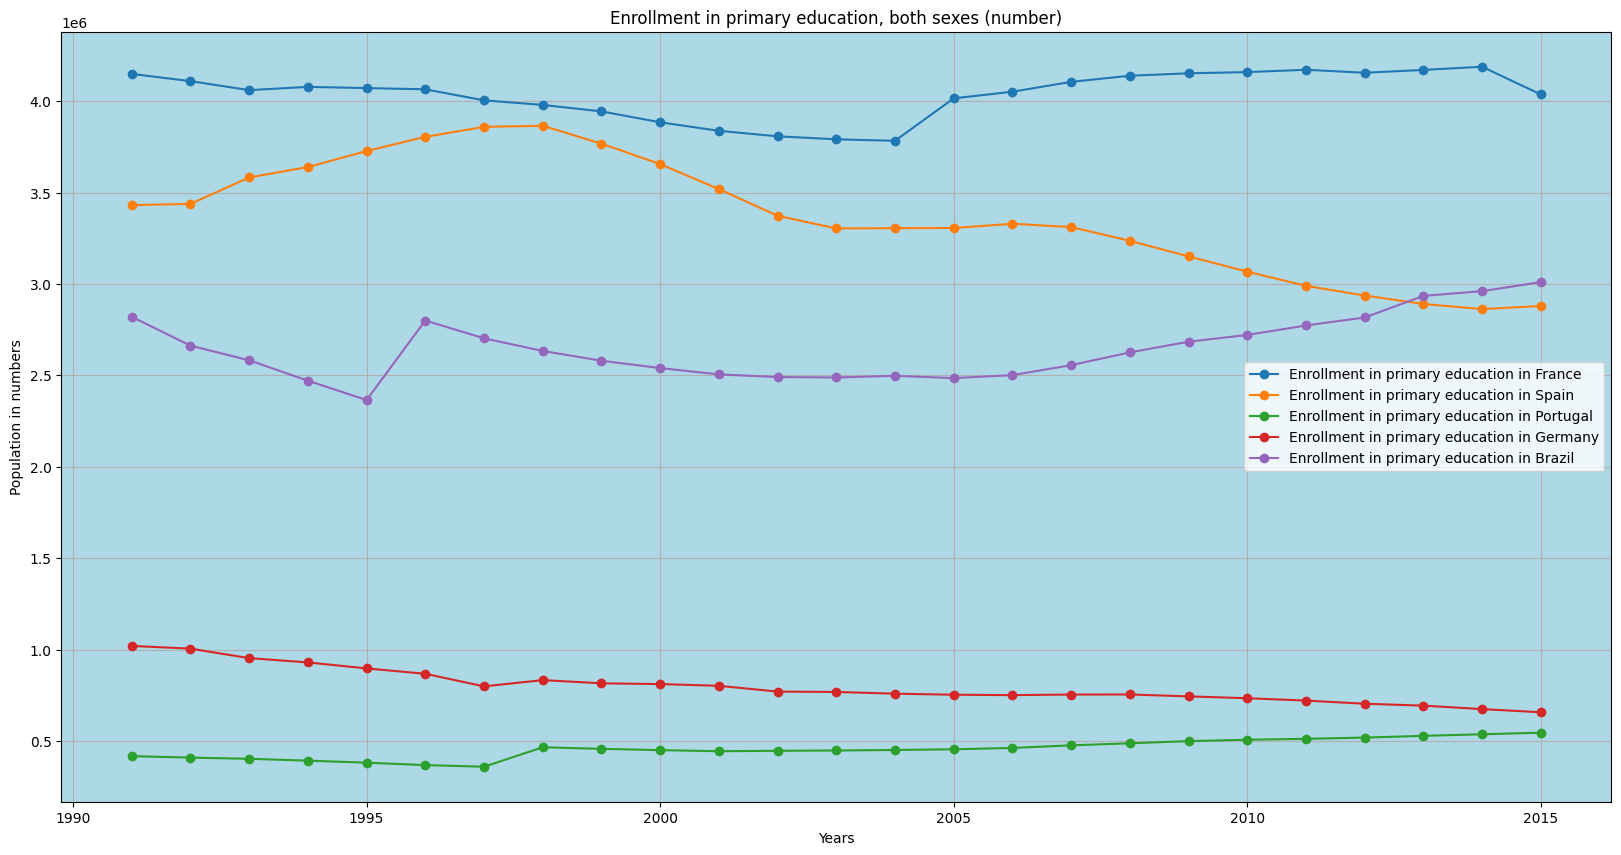

In [13]:
# Plotting the figure with specified size
plt.figure(figsize=(20, 10))

# Setting the background color
plt.gca().set_facecolor('lightblue')

# List of countries to plot
countries = ["France","Spain","Portugal","Germany","Brazil"]
# Plotting line chart for each country
for country in countries:
    plt.plot(primary_education_enrollment['Year'], primary_education_enrollment[country], marker='o', linestyle='-', label=f'Enrollment in primary education in {country}')

# Defining xlabel
plt.xlabel('Years')

# Defining ylabel
plt.ylabel('Population in numbers')

# Defining title
plt.title('Enrollment in primary education, both sexes (number)')

# Adding legend
plt.legend()

# Displaying the graph
plt.grid(True)
plt.show()


### Enrolment in secondary education, both sexes (number)

In [14]:
secondary_education_enrollment

,Year,Ireland,France,Spain,Portugal,Germany,Brazil
1,1991,NaN,5521862.0,7398011.0,345941.0,670035.0,4755322.0
2,1992,NaN,5614894.0,7500078.0,352408.0,759639.0,4773349.0
3,1993,NaN,5573582.0,7933806.0,381630.0,898483.0,4859965.0
4,1994,NaN,5983059.0,8070103.0,387813.0,938653.0,4837802.0
5,1995,NaN,6003797.0,8152297.0,390680.0,945077.0,4744829.0
6,1996,NaN,5980518.0,8260674.0,389374.0,947478.0,4117052.0
7,1997,NaN,5979690.0,8382335.0,389353.0,NaN,3852102.0
8,1998,NaN,5976438.0,8080886.0,354252.0,891773.0,3389191.0
9,1999,NaN,5955495.0,8185146.0,346316.0,847129.0,3299469.0
10,2000,NaN,5928745.0,8307277.0,338247.0,831193.0,3245950.0


In [15]:

# Assuming 'final_df' is your DataFrame containing the data
secondary_education_enrollment['Year'] = pd.to_numeric(secondary_education_enrollment['Year'], errors='coerce')

# Drop rows with NaN values in the 'Year' column
#final_df.dropna(subset=['Year'], inplace=True)

# Optionally, you can verify the data type of the 'Year' column
print(secondary_education_enrollment['Year'].dtype)
# Now we need to replace the 'NaN' entries with some meaningful 
# value since they might affect the visualization to make it inconsistent.

# Firstly using a fillna() with 'mean' method to perform mean values, 
# this will fill 'NaN' with the mean value above it in the column.
secondary_education_enrollment.fillna(secondary_education_enrollment.mean(), inplace = True)

# Matric after filling NaNs.
secondary_education_enrollment

int64


,Year,Ireland,France,Spain,Portugal,Germany,Brazil
1,1991,2.421283e+07,5.521862e+06,7398011.0,345941.000,670035.000000,4755322.0
2,1992,2.421283e+07,5.614894e+06,7500078.0,352408.000,759639.000000,4773349.0
3,1993,2.421283e+07,5.573582e+06,7933806.0,381630.000,898483.000000,4859965.0
4,1994,2.421283e+07,5.983059e+06,8070103.0,387813.000,938653.000000,4837802.0
5,1995,2.421283e+07,6.003797e+06,8152297.0,390680.000,945077.000000,4744829.0
6,1996,2.421283e+07,5.980518e+06,8260674.0,389374.000,947478.000000,4117052.0
7,1997,2.421283e+07,5.979690e+06,8382335.0,389353.000,779606.541667,3852102.0
8,1998,2.421283e+07,5.976438e+06,8080886.0,354252.000,891773.000000,3389191.0
9,1999,2.421283e+07,5.955495e+06,8185146.0,346316.000,847129.000000,3299469.0
10,2000,2.421283e+07,5.928745e+06,8307277.0,338247.000,831193.000000,3245950.0


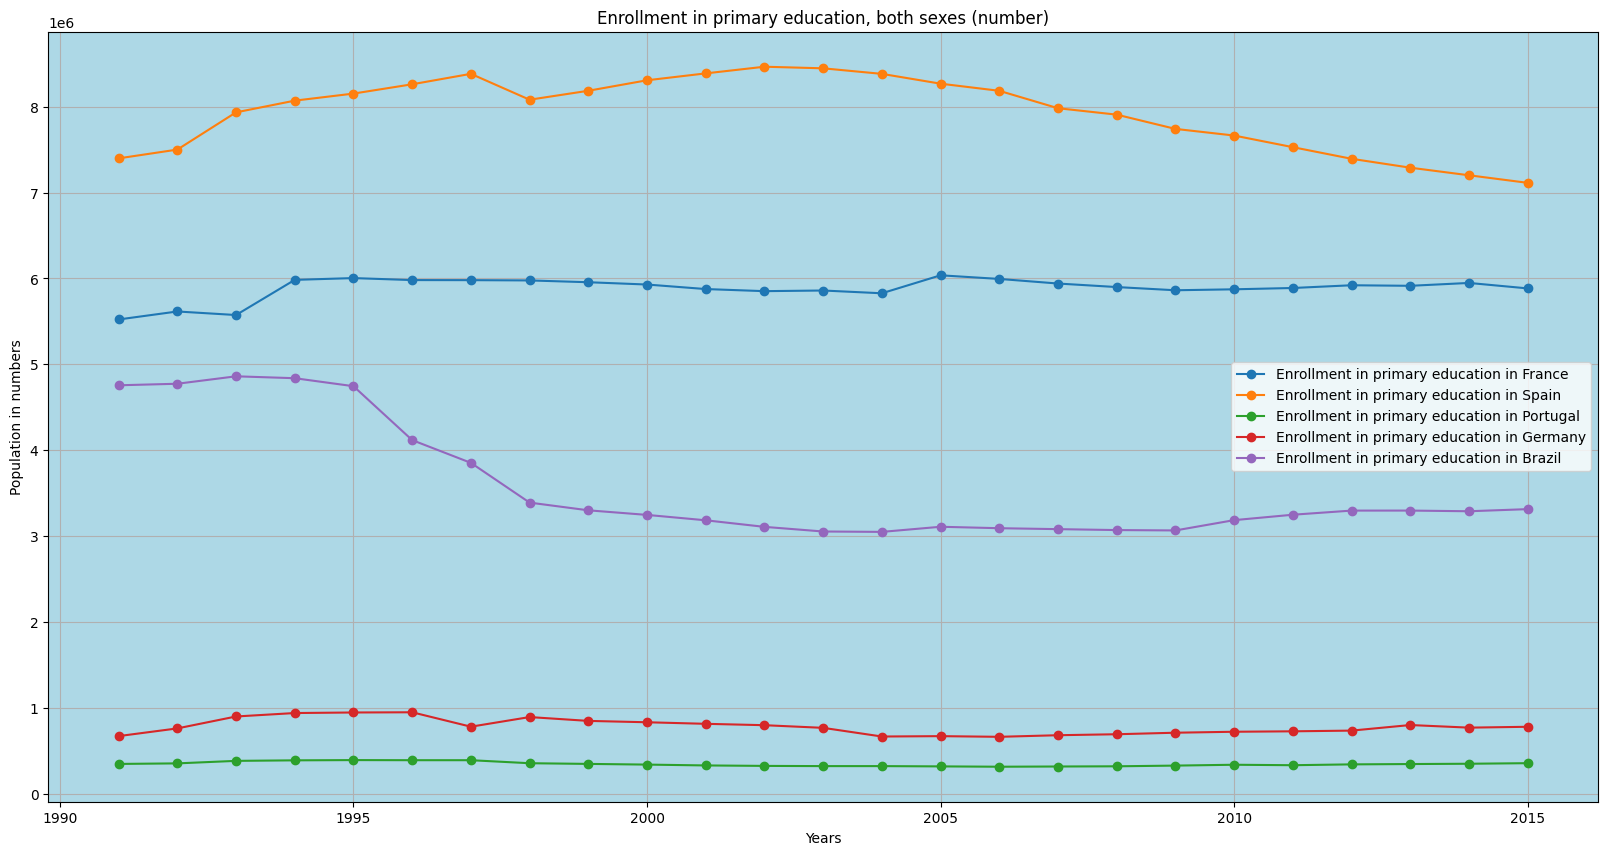

In [16]:
# Plotting the figure with specified size
plt.figure(figsize=(20, 10))

# Setting the background color
plt.gca().set_facecolor('lightblue')

# List of countries to plot
countries = ["France","Spain","Portugal","Germany","Brazil"]
# Plotting line chart for each country
for country in countries:
    plt.plot(secondary_education_enrollment['Year'], secondary_education_enrollment[country], marker='o', linestyle='-', label=f'Enrollment in primary education in {country}')

# Defining xlabel
plt.xlabel('Years')

# Defining ylabel
plt.ylabel('Population in numbers')

# Defining title
plt.title('Enrollment in primary education, both sexes (number)')

# Adding legend
plt.legend()

# Displaying the graph
plt.grid(True)
plt.show()


In [17]:
pre_primary_population

,Year,Ireland,France,Spain,Portugal,Germany,Brazil
1,1991,NaN,2340978.0,2633575.0,127733.0,358071.0,1313289.0
2,1992,NaN,2324271.0,2661709.0,122180.0,346580.0,1276705.0
3,1993,NaN,2293257.0,2675486.0,116141.0,336835.0,1252510.0
4,1994,NaN,2257447.0,2674384.0,110329.0,328806.0,1234356.0
5,1995,NaN,2245778.0,2660099.0,105686.0,322608.0,1202848.0
6,1996,NaN,2229141.0,2630818.0,103374.0,317991.0,1178743.0
7,1997,NaN,2204216.0,2549179.0,101158.0,318782.0,1168746.0
8,1998,NaN,2178764.0,2450842.0,49575.0,320878.0,1163574.0
9,1999,9248239.0,2158098.0,2357265.0,49578.0,322617.0,1160538.0
10,2000,NaN,2154137.0,2328218.0,49851.0,318446.0,1148328.0


In [18]:

# Assuming 'final_df' is your DataFrame containing the data
pre_primary_population['Year'] = pd.to_numeric(pre_primary_population['Year'], errors='coerce')

# Drop rows with NaN values in the 'Year' column
#final_df.dropna(subset=['Year'], inplace=True)

# Optionally, you can verify the data type of the 'Year' column
print(pre_primary_population['Year'].dtype)
# Now we need to replace the 'NaN' entries with some meaningful 
# value since they might affect the visualization to make it inconsistent.

# Firstly using a fillna() with 'mean' method to perform mean values, 
# this will fill 'NaN' with the mean value above it in the column.
pre_primary_population.fillna(pre_primary_population.mean(), inplace = True)

# Matric after filling NaNs.
pre_primary_population

int64


,Year,Ireland,France,Spain,Portugal,Germany,Brazil
1,1991,8.557360e+06,2340978.0,2633575.0,127733.0,358071.0,1313289.0
2,1992,8.557360e+06,2324271.0,2661709.0,122180.0,346580.0,1276705.0
3,1993,8.557360e+06,2293257.0,2675486.0,116141.0,336835.0,1252510.0
4,1994,8.557360e+06,2257447.0,2674384.0,110329.0,328806.0,1234356.0
5,1995,8.557360e+06,2245778.0,2660099.0,105686.0,322608.0,1202848.0
6,1996,8.557360e+06,2229141.0,2630818.0,103374.0,317991.0,1178743.0
7,1997,8.557360e+06,2204216.0,2549179.0,101158.0,318782.0,1168746.0
8,1998,8.557360e+06,2178764.0,2450842.0,49575.0,320878.0,1163574.0
9,1999,9.248239e+06,2158098.0,2357265.0,49578.0,322617.0,1160538.0
10,2000,8.557360e+06,2154137.0,2328218.0,49851.0,318446.0,1148328.0


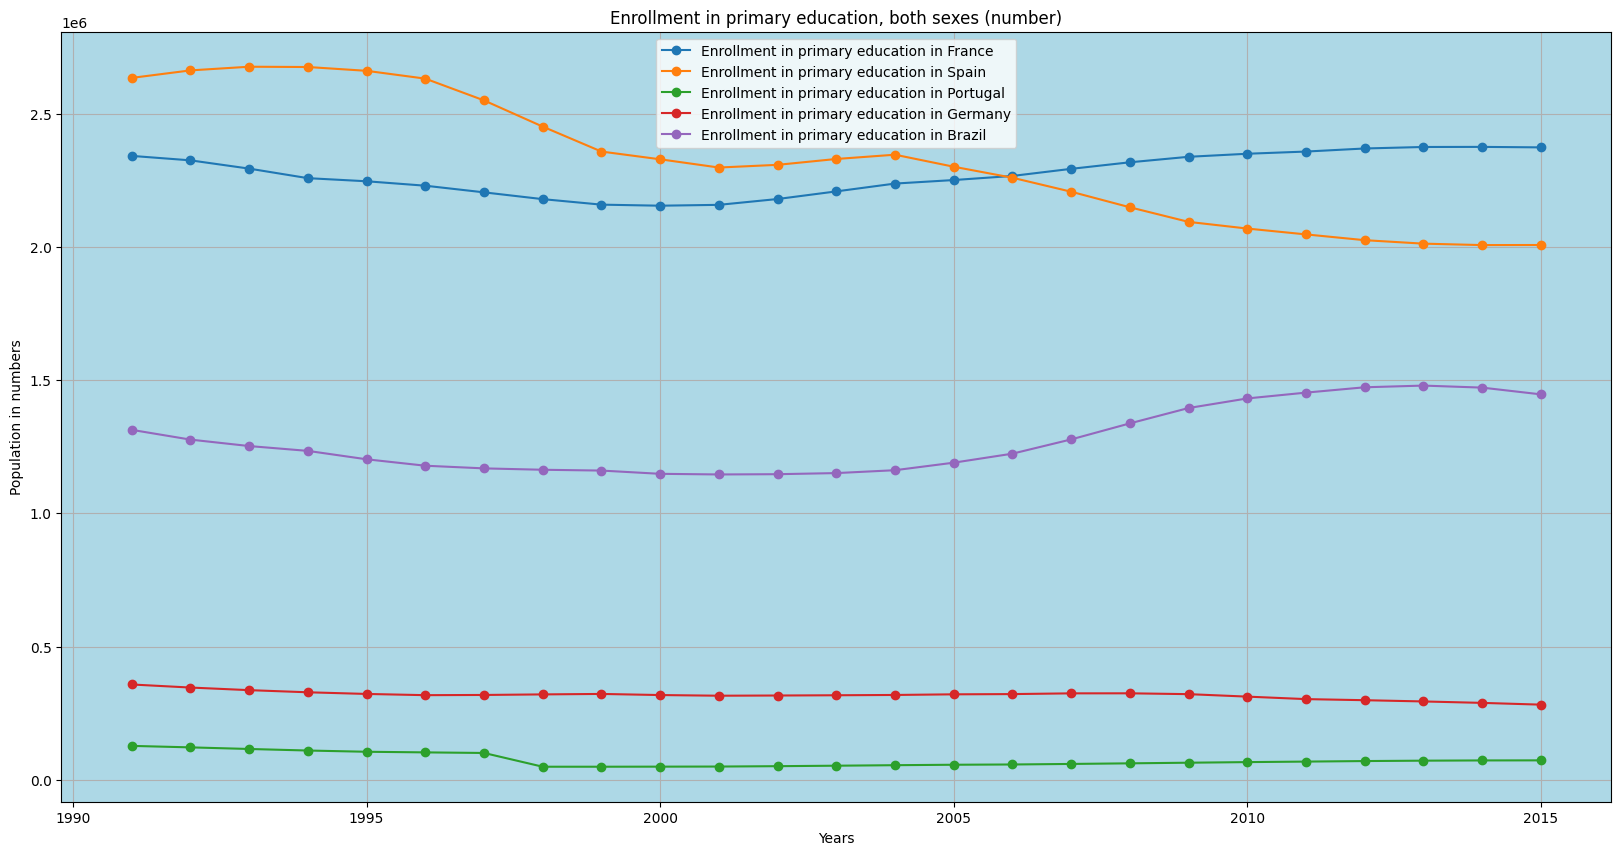

In [19]:
# Plotting the figure with specified size
plt.figure(figsize=(20, 10))

# Setting the background color
plt.gca().set_facecolor('lightblue')

# List of countries to plot
countries = ["France","Spain","Portugal","Germany","Brazil"]
# Plotting line chart for each country
for country in countries:
    plt.plot(pre_primary_population['Year'], pre_primary_population[country], marker='o', linestyle='-', label=f'Enrollment in primary education in {country}')

# Defining xlabel
plt.xlabel('Years')

# Defining ylabel
plt.ylabel('Population in numbers')

# Defining title
plt.title('Enrollment in primary education, both sexes (number)')

# Adding legend
plt.legend()

# Displaying the graph
plt.grid(True)
plt.show()


In [20]:
primary_population

,Year,Ireland,France,Spain,Portugal,Germany,Brazil
1,1991,NaN,3789441.0,3368196.0,419850.0,850769.0,2679051.0
2,1992,NaN,3847084.0,3461816.0,413921.0,820803.0,2544400.0
3,1993,NaN,3883719.0,3546437.0,405643.0,792815.0,2426819.0
4,1994,NaN,3893412.0,3613305.0,394994.0,766288.0,2329725.0
5,1995,NaN,3876533.0,3657538.0,382066.0,740759.0,2252482.0
6,1996,NaN,3845889.0,3679719.0,367847.0,716171.0,2674302.0
7,1997,NaN,3824421.0,3675324.0,454637.0,695856.0,2593496.0
8,1998,NaN,3795118.0,3624718.0,457090.0,679456.0,2523784.0
9,1999,12640905.0,3757611.0,3530023.0,444178.0,667016.0,2468815.0
10,2000,NaN,3715700.0,3411162.0,434155.0,658212.0,2431060.0


In [21]:

# Assuming 'final_df' is your DataFrame containing the data
primary_population['Year'] = pd.to_numeric(primary_population['Year'], errors='coerce')

# Drop rows with NaN values in the 'Year' column
#final_df.dropna(subset=['Year'], inplace=True)

# Optionally, you can verify the data type of the 'Year' column
print(primary_population['Year'].dtype)
# Now we need to replace the 'NaN' entries with some meaningful 
# value since they might affect the visualization to make it inconsistent.

# Firstly using a fillna() with 'mean' method to perform mean values, 
# this will fill 'NaN' with the mean value above it in the column.
primary_population.fillna(primary_population.mean(), inplace = True)

# Matric after filling NaNs.
primary_population

int64


,Year,Ireland,France,Spain,Portugal,Germany,Brazil
1,1991,1.366064e+07,3789441.0,3368196.0,419850.0,850769.0,2679051.0
2,1992,1.366064e+07,3847084.0,3461816.0,413921.0,820803.0,2544400.0
3,1993,1.366064e+07,3883719.0,3546437.0,405643.0,792815.0,2426819.0
4,1994,1.366064e+07,3893412.0,3613305.0,394994.0,766288.0,2329725.0
5,1995,1.366064e+07,3876533.0,3657538.0,382066.0,740759.0,2252482.0
6,1996,1.366064e+07,3845889.0,3679719.0,367847.0,716171.0,2674302.0
7,1997,1.366064e+07,3824421.0,3675324.0,454637.0,695856.0,2593496.0
8,1998,1.366064e+07,3795118.0,3624718.0,457090.0,679456.0,2523784.0
9,1999,1.264090e+07,3757611.0,3530023.0,444178.0,667016.0,2468815.0
10,2000,1.366064e+07,3715700.0,3411162.0,434155.0,658212.0,2431060.0


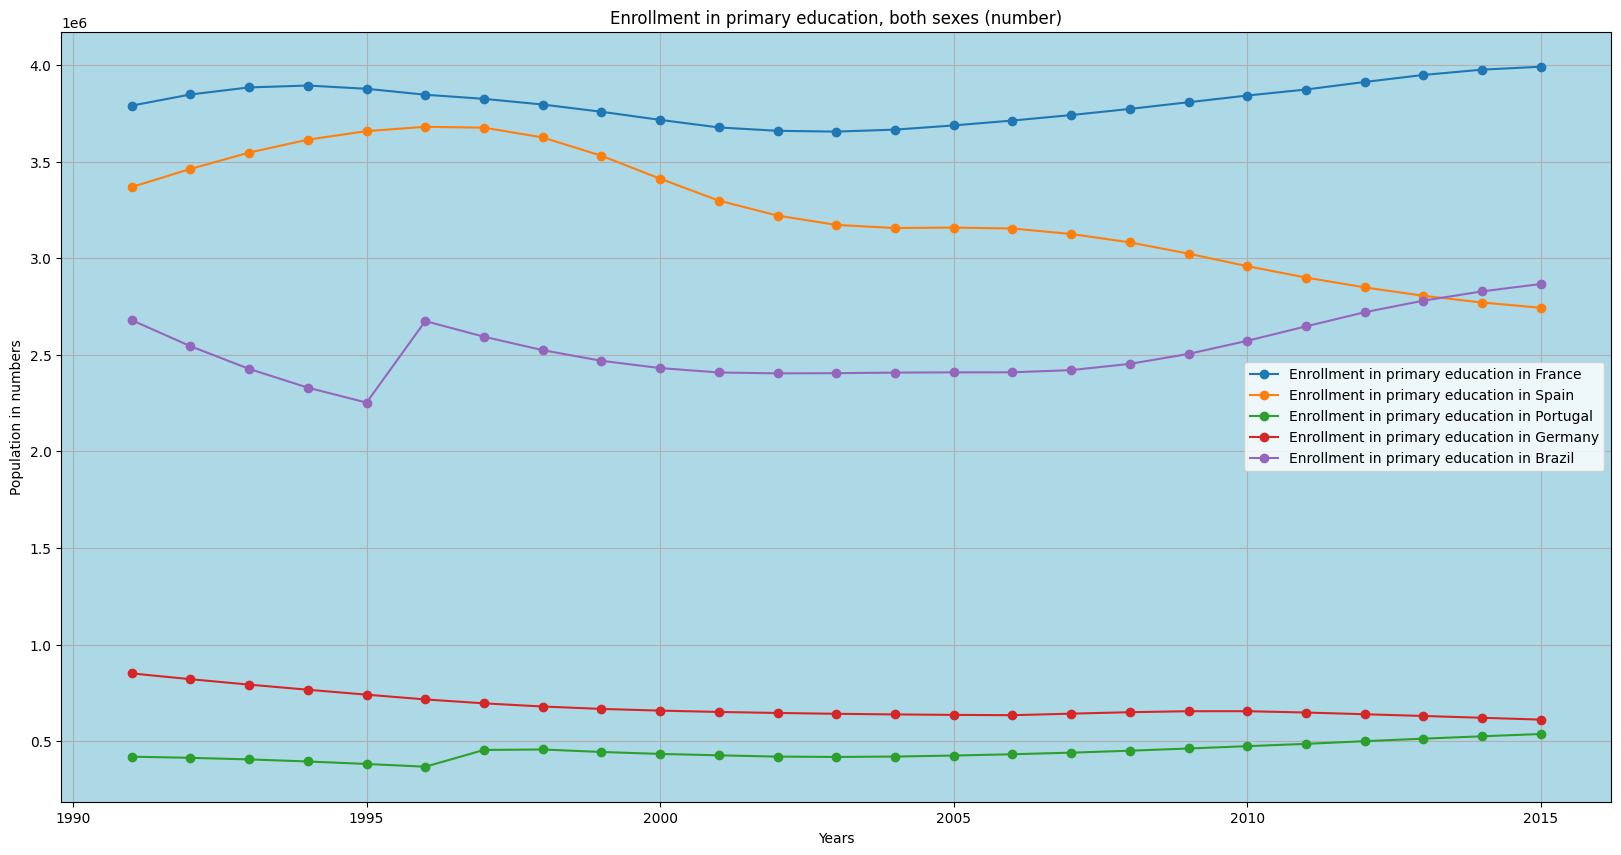

In [22]:
# Plotting the figure with specified size
plt.figure(figsize=(20, 10))

# Setting the background color
plt.gca().set_facecolor('lightblue')

# List of countries to plot
countries = ["France","Spain","Portugal","Germany","Brazil"]
# Plotting line chart for each country
for country in countries:
    plt.plot(primary_population['Year'], primary_population[country], marker='o', linestyle='-', label=f'Enrollment in primary education in {country}')

# Defining xlabel
plt.xlabel('Years')

# Defining ylabel
plt.ylabel('Population in numbers')

# Defining title
plt.title('Enrollment in primary education, both sexes (number)')

# Adding legend
plt.legend()

# Displaying the graph
plt.grid(True)
plt.show()


In [23]:
secondary_population

,Year,Ireland,France,Spain,Portugal,Germany,Brazil
1,1991,NaN,5440561.0,7436493.0,361710.0,990380.0,4607485.0
2,1992,NaN,5334421.0,7425214.0,358591.0,973601.0,4530237.0
3,1993,NaN,5264180.0,7506411.0,357390.0,954907.0,4429881.0
4,1994,NaN,5238946.0,7635418.0,357236.0,935304.0,4305551.0
5,1995,NaN,5256201.0,7772479.0,357752.0,914218.0,4156612.0
6,1996,NaN,5307714.0,7909921.0,358015.0,891160.0,3500599.0
7,1997,NaN,5361539.0,8045393.0,352952.0,866173.0,3344076.0
8,1998,NaN,5407379.0,8163890.0,351953.0,841438.0,3194568.0
9,1999,24175276.0,5435991.0,8258965.0,346649.0,817244.0,3060728.0
10,2000,NaN,5450339.0,8320212.0,340172.0,792816.0,2943678.0


In [24]:

# Assuming 'final_df' is your DataFrame containing the data
secondary_population['Year'] = pd.to_numeric(secondary_population['Year'], errors='coerce')

# Drop rows with NaN values in the 'Year' column
#final_df.dropna(subset=['Year'], inplace=True)

# Optionally, you can verify the data type of the 'Year' column
print(secondary_population['Year'].dtype)
# Now we need to replace the 'NaN' entries with some meaningful 
# value since they might affect the visualization to make it inconsistent.

# Firstly using a fillna() with 'mean' method to perform mean values, 
# this will fill 'NaN' with the mean value above it in the column.
secondary_population.fillna(secondary_population.mean(), inplace = True)

# Matric after filling NaNs.
secondary_population

int64


,Year,Ireland,France,Spain,Portugal,Germany,Brazil
1,1991,2.429576e+07,5440561.0,7436493.0,361710.0,990380.0,4607485.0
2,1992,2.429576e+07,5334421.0,7425214.0,358591.0,973601.0,4530237.0
3,1993,2.429576e+07,5264180.0,7506411.0,357390.0,954907.0,4429881.0
4,1994,2.429576e+07,5238946.0,7635418.0,357236.0,935304.0,4305551.0
5,1995,2.429576e+07,5256201.0,7772479.0,357752.0,914218.0,4156612.0
6,1996,2.429576e+07,5307714.0,7909921.0,358015.0,891160.0,3500599.0
7,1997,2.429576e+07,5361539.0,8045393.0,352952.0,866173.0,3344076.0
8,1998,2.429576e+07,5407379.0,8163890.0,351953.0,841438.0,3194568.0
9,1999,2.417528e+07,5435991.0,8258965.0,346649.0,817244.0,3060728.0
10,2000,2.429576e+07,5450339.0,8320212.0,340172.0,792816.0,2943678.0


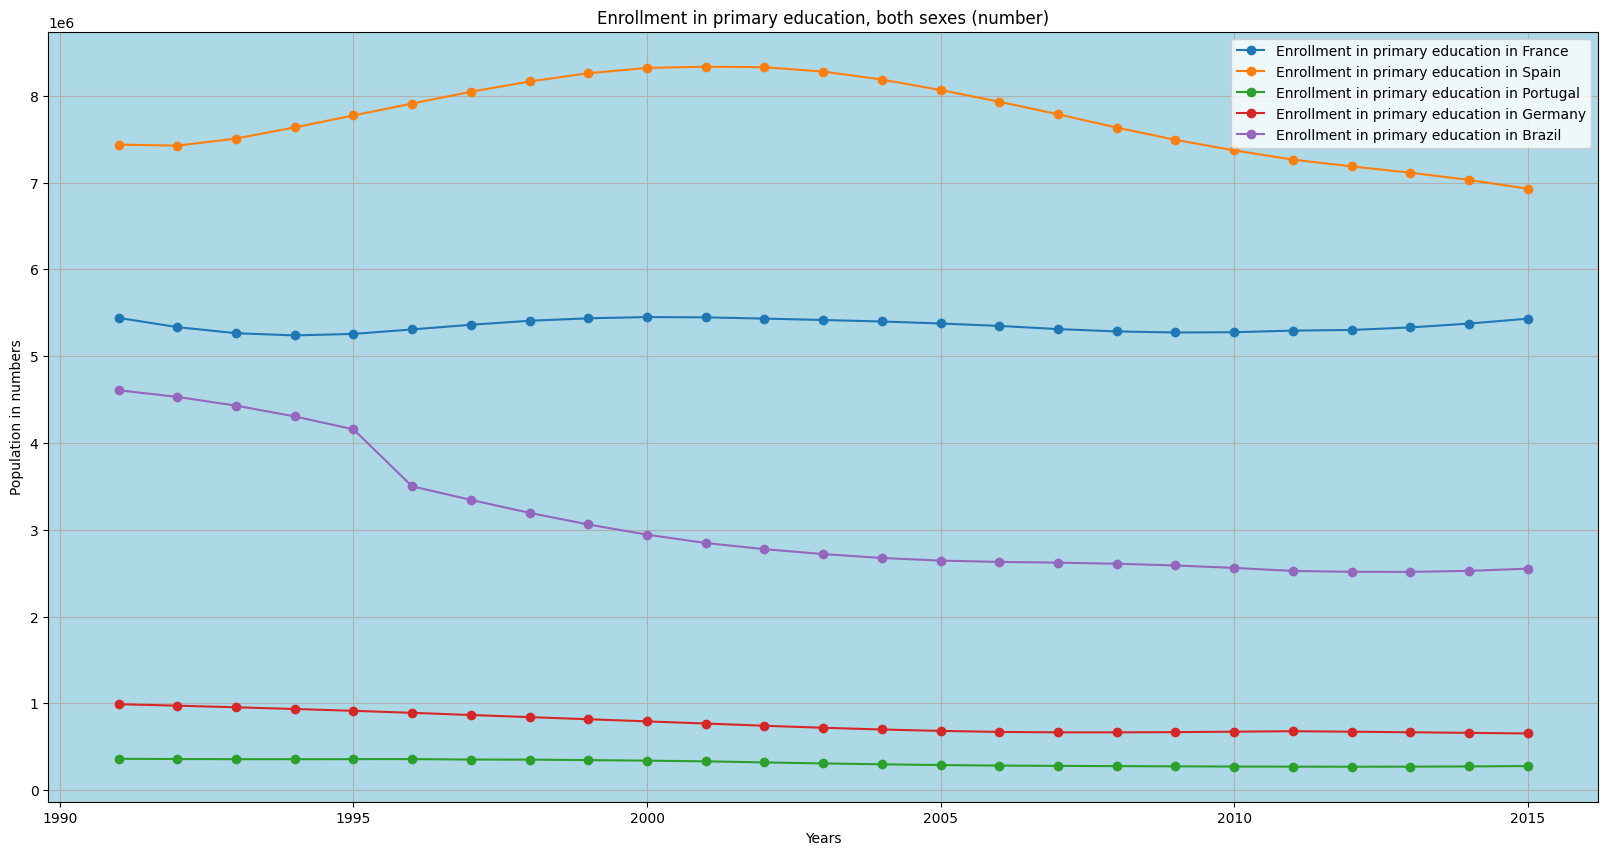

In [25]:
# Plotting the figure with specified size
plt.figure(figsize=(20, 10))

# Setting the background color
plt.gca().set_facecolor('lightblue')

# List of countries to plot
countries = ["France","Spain","Portugal","Germany","Brazil"]
# Plotting line chart for each country
for country in countries:
    plt.plot(secondary_population['Year'], secondary_population[country], marker='o', linestyle='-', label=f'Enrollment in primary education in {country}')

# Defining xlabel
plt.xlabel('Years')

# Defining ylabel
plt.ylabel('Population in numbers')

# Defining title
plt.title('Enrollment in primary education, both sexes (number)')

# Adding legend
plt.legend()

# Displaying the graph
plt.grid(True)
plt.show()


In [26]:
tertiary_population

,Year,Ireland,France,Spain,Portugal,Germany,Brazil
1,1991,NaN,4302863.0,6102147.0,323290.0,792828.0,3295790.0
2,1992,NaN,4298384.0,5770013.0,333051.0,806465.0,3310220.0
3,1993,NaN,4269558.0,5394960.0,339774.0,817204.0,3323355.0
4,1994,NaN,4208015.0,5051629.0,344474.0,822662.0,3331116.0
5,1995,NaN,4119141.0,4786962.0,347583.0,823587.0,3333715.0
6,1996,NaN,4001360.0,4592409.0,350266.0,820351.0,3333423.0
7,1997,NaN,3876946.0,4473345.0,349901.0,812191.0,3327187.0
8,1998,NaN,3774298.0,4417933.0,346113.0,802071.0,3298157.0
9,1999,15275652.0,3716717.0,4396943.0,346447.0,790527.0,3242254.0
10,2000,NaN,3702719.0,4393764.0,347374.0,777445.0,3163714.0


In [27]:

# Assuming 'final_df' is your DataFrame containing the data
tertiary_population['Year'] = pd.to_numeric(tertiary_population['Year'], errors='coerce')

# Drop rows with NaN values in the 'Year' column
#final_df.dropna(subset=['Year'], inplace=True)

# Optionally, you can verify the data type of the 'Year' column
print(tertiary_population['Year'].dtype)
# Now we need to replace the 'NaN' entries with some meaningful 
# value since they might affect the visualization to make it inconsistent.

# Firstly using a fillna() with 'mean' method to perform mean values, 
# this will fill 'NaN' with the mean value above it in the column.
tertiary_population.fillna(tertiary_population.mean(), inplace = True)

# Matric after filling NaNs.
tertiary_population

int64


,Year,Ireland,France,Spain,Portugal,Germany,Brazil
1,1991,1.667047e+07,4.302863e+06,6102147.0,323290.0,792828.0,3295790.0
2,1992,1.667047e+07,4.298384e+06,5770013.0,333051.0,806465.0,3310220.0
3,1993,1.667047e+07,4.269558e+06,5394960.0,339774.0,817204.0,3323355.0
4,1994,1.667047e+07,4.208015e+06,5051629.0,344474.0,822662.0,3331116.0
5,1995,1.667047e+07,4.119141e+06,4786962.0,347583.0,823587.0,3333715.0
6,1996,1.667047e+07,4.001360e+06,4592409.0,350266.0,820351.0,3333423.0
7,1997,1.667047e+07,3.876946e+06,4473345.0,349901.0,812191.0,3327187.0
8,1998,1.667047e+07,3.774298e+06,4417933.0,346113.0,802071.0,3298157.0
9,1999,1.527565e+07,3.716717e+06,4396943.0,346447.0,790527.0,3242254.0
10,2000,1.667047e+07,3.702719e+06,4393764.0,347374.0,777445.0,3163714.0


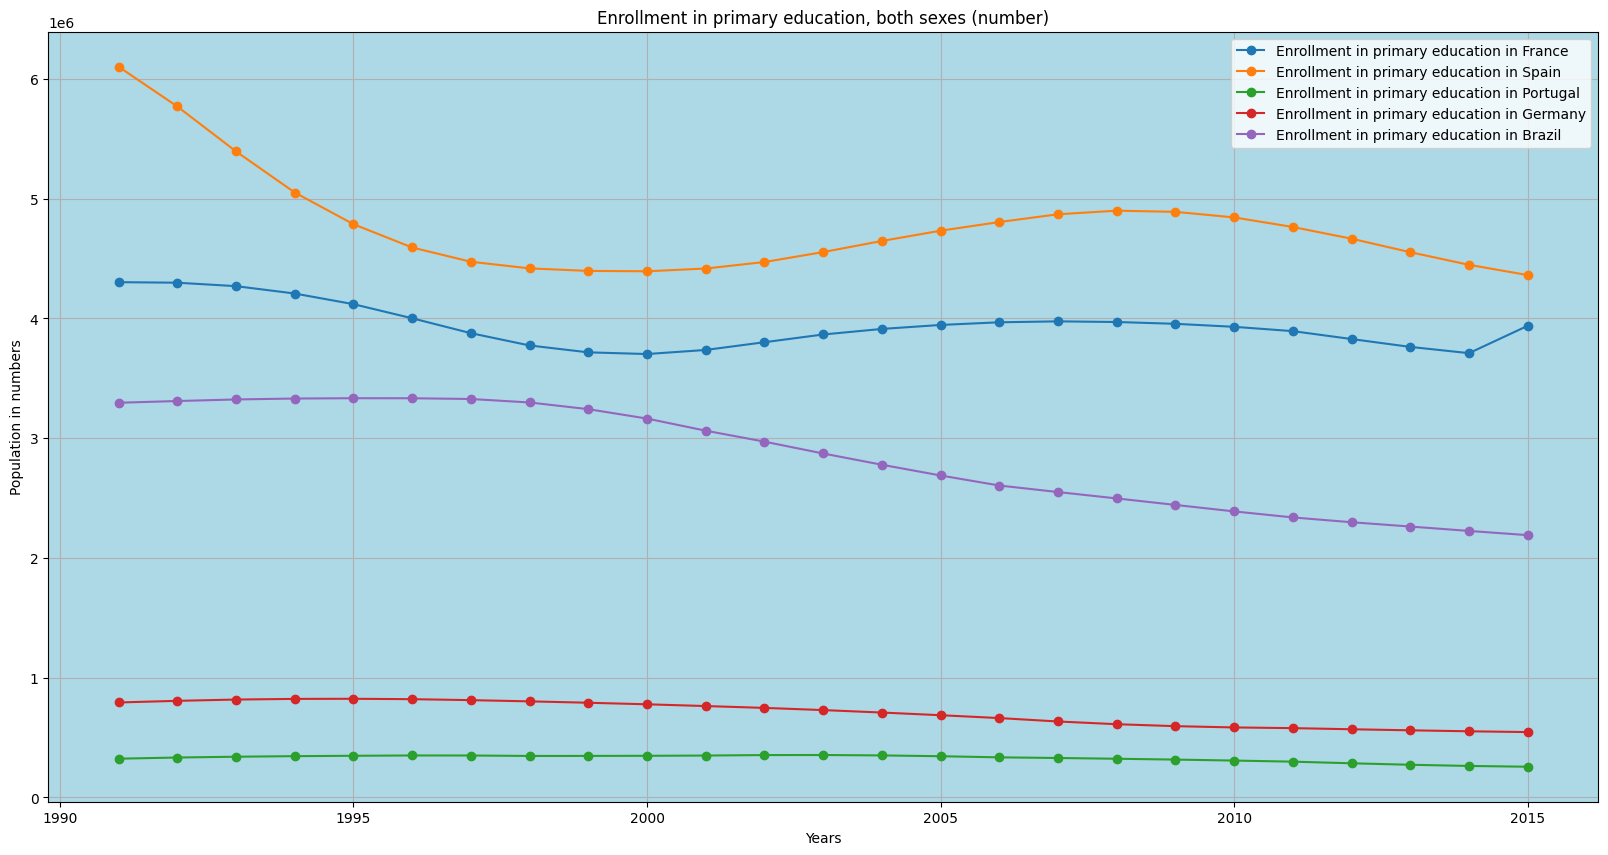

In [28]:
# Plotting the figure with specified size
plt.figure(figsize=(20, 10))

# Setting the background color
plt.gca().set_facecolor('lightblue')

# List of countries to plot
countries = ["France","Spain","Portugal","Germany","Brazil"]
# Plotting line chart for each country
for country in countries:
    plt.plot(tertiary_population['Year'], tertiary_population[country], marker='o', linestyle='-', label=f'Enrollment in primary education in {country}')

# Defining xlabel
plt.xlabel('Years')

# Defining ylabel
plt.ylabel('Population in numbers')

# Defining title
plt.title('Enrollment in primary education, both sexes (number)')

# Adding legend
plt.legend()

# Displaying the graph
plt.grid(True)
plt.show()


# Compare 

Following indicators has been used for analyzation

In [29]:
# Adding whole data of indicator1 in variable a
a = primary_education_enrollment[["Ireland","France","Spain","Portugal","Germany","Brazil"]].iloc[0:]
a.rename(columns={'Ireland':'Ireland(SE.PRM.ENRL)', 'France':'France(SE.PRM.ENRL)', 'Spain':'Spain(SE.PRM.ENRL)', 'Portugal':'Portugal(SE.PRM.ENRL)', 'Germany':'Germany(SE.PRM.ENRL)', 'Brazil':'Brazil(SE.PRM.ENRL)'}, inplace=True)

# Adding whole data of indicator2 in variable b
b = secondary_education_enrollment[["Ireland","France","Spain","Portugal","Germany","Brazil"]].iloc[0:]
b.rename(columns={'Ireland': 'Ireland(SE.SEC.ENRL)', 'France':'France(SE.SEC.ENRL)', 'Spain':'Spain(SE.SEC.ENRL)', 'Portugal':'Portugal(SE.SEC.ENRL)', 'Germany':'Germany(SE.SEC.ENRL)', 'Brazil':'Brazil(SE.SEC.ENRL)'}, inplace=True)

# Adding whole data of indicator3 in variable c
c = pre_primary_population[["Ireland","France","Spain","Portugal","Germany","Brazil"]].iloc[0:]
c.rename(columns={'Ireland': 'Ireland(SP.PRE.TOTL.IN)', 'France':'France(SP.PRE.TOTL.IN)', 'Spain':'Spain(SP.PRE.TOTL.IN)', 'Portugal':'Portugal(SP.PRE.TOTL.IN)', 'Germany':'Germany(SP.PRE.TOTL.IN)', 'Brazil':'Brazil(SP.PRE.TOTL.IN)'}, inplace=True)

# Adding whole data of indicator4 in variable d
d = primary_population[["Ireland","France","Spain","Portugal","Germany","Brazil"]].iloc[0:]
d.rename(columns={'Ireland': 'Ireland(SP.PRM.TOTL.IN)', 'France':'France(SP.PRM.TOTL.IN)', 'Spain':'Spain(SP.PRM.TOTL.IN)', 'Portugal':'Portugal(SP.PRM.TOTL.IN)', 'Germany':'Germany(SP.PRM.TOTL.IN)', 'Brazil':'Brazil(SP.PRM.TOTL.IN)'}, inplace=True)

# Adding whole data of indicator5 in variable e
e = secondary_population[["Ireland","France","Spain","Portugal","Germany","Brazil"]].iloc[0:]
e.rename(columns={'Ireland': 'Ireland(SP.SEC.TOTL.IN)', 'France':'France(SP.SEC.TOTL.IN)', 'Spain':'Spain(SP.SEC.TOTL.IN)', 'Portugal':'Portugal(SP.SEC.TOTL.IN)', 'Germany':'Germany(SP.SEC.TOTL.IN)', 'Brazil':'Brazil(SP.SEC.TOTL.IN)'}, inplace=True)

# Adding whole data of indicator6 in variable f
f = tertiary_population[["Ireland","France","Spain","Portugal","Germany","Brazil"]].iloc[0:]
f.rename(columns={'Ireland': 'Ireland(SP.TER.TOTL.IN)', 'France':'France(SP.TER.TOTL.IN)', 'Spain':'Spain(SP.TER.TOTL.IN)', 'Portugal':'Portugal(SP.TER.TOTL.IN)', 'Germany':'Germany(SP.TER.TOTL.IN)', 'Brazil':'Brazil(SP.TER.TOTL.IN)'}, inplace=True)

    
    
add=[a,b,c,d,e,f]
analysis_combine=pd.concat(add,axis=1)

analysis_combine

,Ireland(SE.PRM.ENRL),France(SE.PRM.ENRL),Spain(SE.PRM.ENRL),Portugal(SE.PRM.ENRL),Germany(SE.PRM.ENRL),Brazil(SE.PRM.ENRL),Ireland(SE.SEC.ENRL),France(SE.SEC.ENRL),Spain(SE.SEC.ENRL),Portugal(SE.SEC.ENRL),...,Spain(SP.SEC.TOTL.IN),Portugal(SP.SEC.TOTL.IN),Germany(SP.SEC.TOTL.IN),Brazil(SP.SEC.TOTL.IN),Ireland(SP.TER.TOTL.IN),France(SP.TER.TOTL.IN),Spain(SP.TER.TOTL.IN),Portugal(SP.TER.TOTL.IN),Germany(SP.TER.TOTL.IN),Brazil(SP.TER.TOTL.IN)
1,1.900286e+07,4149143.000,3431385.0,416747.0,1.019794e+06,2820497.0,2.421283e+07,5.521862e+06,7398011.0,345941.000,...,7436493.0,361710.0,990380.0,4607485.0,1.667047e+07,4.302863e+06,6102147.0,323290.0,792828.0,3295790.0
2,1.923150e+07,4109797.000,3438052.0,408567.0,1.004848e+06,2662490.0,2.421283e+07,5.614894e+06,7500078.0,352408.000,...,7425214.0,358591.0,973601.0,4530237.0,1.667047e+07,4.298384e+06,5770013.0,333051.0,806465.0,3310220.0
3,1.941018e+07,4060408.000,3582582.0,402226.0,9.529410e+05,2582343.0,2.421283e+07,5.573582e+06,7933806.0,381630.000,...,7506411.0,357390.0,954907.0,4429881.0,1.667047e+07,4.269558e+06,5394960.0,339774.0,817204.0,3323355.0
4,1.993048e+07,4078370.000,3639717.0,391998.0,9.294710e+05,2471084.0,2.421283e+07,5.983059e+06,8070103.0,387813.000,...,7635418.0,357236.0,935304.0,4305551.0,1.667047e+07,4.208015e+06,5051629.0,344474.0,822662.0,3331116.0
5,1.848399e+07,4071599.000,3727157.0,380983.0,8.966810e+05,2364910.0,2.421283e+07,6.003797e+06,8152297.0,390680.000,...,7772479.0,357752.0,914218.0,4156612.0,1.667047e+07,4.119141e+06,4786962.0,347583.0,823587.0,3333715.0
6,1.848399e+07,4065005.000,3804887.0,367689.0,8.672530e+05,2799960.0,2.421283e+07,5.980518e+06,8260674.0,389374.000,...,7909921.0,358015.0,891160.0,3500599.0,1.667047e+07,4.001360e+06,4592409.0,350266.0,820351.0,3333423.0
7,2.056813e+07,4004704.000,3859490.0,358830.0,7.984994e+05,2702553.0,2.421283e+07,5.979690e+06,8382335.0,389353.000,...,8045393.0,352952.0,866173.0,3344076.0,1.667047e+07,3.876946e+06,4473345.0,349901.0,812191.0,3327187.0
8,1.848399e+07,3979453.000,3865724.0,465186.0,8.326960e+05,2633678.0,2.421283e+07,5.976438e+06,8080886.0,354252.000,...,8163890.0,351953.0,841438.0,3194568.0,1.667047e+07,3.774298e+06,4417933.0,346113.0,802071.0,3298157.0
9,2.093908e+07,3944227.000,3767460.0,456564.0,8.152310e+05,2579908.0,2.421283e+07,5.955495e+06,8185146.0,346316.000,...,8258965.0,346649.0,817244.0,3060728.0,1.527565e+07,3.716717e+06,4396943.0,346447.0,790527.0,3242254.0
10,2.021151e+07,3884560.000,3655859.0,449638.0,8.109960e+05,2539995.0,2.421283e+07,5.928745e+06,8307277.0,338247.000,...,8320212.0,340172.0,792816.0,2943678.0,1.667047e+07,3.702719e+06,4393764.0,347374.0,777445.0,3163714.0


In [30]:
print(analysis_combine.corr())

                          Ireland(SE.PRM.ENRL)  France(SE.PRM.ENRL)  \
Ireland(SE.PRM.ENRL)                  1.000000            -0.620998   
France(SE.PRM.ENRL)                  -0.620998             1.000000   
Spain(SE.PRM.ENRL)                    0.825444            -0.402624   
Portugal(SE.PRM.ENRL)                -0.749463             0.293329   
Germany(SE.PRM.ENRL)                  0.581237            -0.013040   
Brazil(SE.PRM.ENRL)                  -0.603799             0.568244   
Ireland(SE.SEC.ENRL)                  0.412379            -0.604816   
France(SE.SEC.ENRL)                  -0.094284            -0.075833   
Spain(SE.SEC.ENRL)                    0.711670            -0.760103   
Portugal(SE.SEC.ENRL)                 0.249599             0.203967   
Germany(SE.SEC.ENRL)                  0.336096            -0.125530   
Brazil(SE.SEC.ENRL)                   0.319628             0.260675   
Ireland(SP.PRE.TOTL.IN)               0.508498            -0.556484   
France

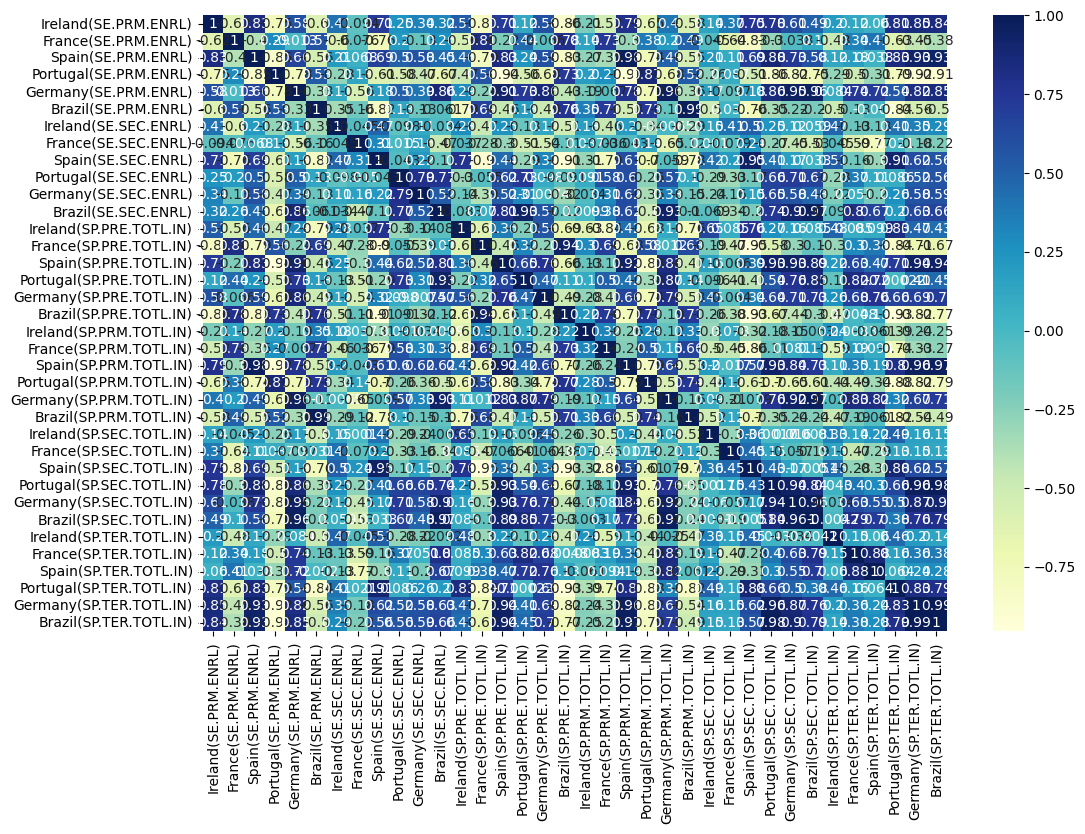

In [31]:
#setting the required figsize
fig = plt.figure(figsize =(12, 8))

#plotting a graph using sns.heatmap correllation
dataplot = sns.heatmap(analysis_combine.corr(), cmap="YlGnBu", annot=True)

# Normalisation

In [32]:
# Selecting the columns to be normalized (excluding the 'Year' column)
columns_to_normalize = ['Ireland', 'France', 'Spain', 'Portugal', 'Germany', 'Brazil']
# Creating a MinMaxScaler object
scaler = MinMaxScaler()
# Fit the scaler to your data and transform it
primary_education_enrollment[columns_to_normalize] = scaler.fit_transform(primary_education_enrollment[columns_to_normalize])
print(primary_education_enrollment)

    Year   Ireland    France     Spain  Portugal   Germany    Brazil
1   1991  0.596974  0.902779  0.566975  0.311338  1.000000  0.705796
2   1992  0.644566  0.805714  0.573622  0.267366  0.958834  0.461011
3   1993  0.681758  0.683872  0.717714  0.233279  0.815866  0.336847
4   1994  0.790060  0.728184  0.774677  0.178298  0.751222  0.164485
5   1995  0.488969  0.711480  0.861852  0.119086  0.660908  0.000000
6   1996  0.488969  0.695213  0.939347  0.047622  0.579854  0.673980
7   1997  0.922787  0.546452  0.993785  0.000000  0.390486  0.523077
8   1998  0.488969  0.484158  1.000000  0.571727  0.484674  0.416376
9   1999  1.000000  0.397257  0.902033  0.525378  0.436570  0.333075
10  2000  0.848555  0.250060  0.790770  0.488147  0.424905  0.271242
11  2001  0.747847  0.134956  0.654376  0.455780  0.398874  0.217342
12  2002  0.675556  0.060544  0.508942  0.468306  0.311741  0.194942
13  2003  0.579543  0.020619  0.439713  0.477288  0.306128  0.191185
14  2004  0.592050  0.000000  0.44

In [33]:
secondary_education_enrollment[columns_to_normalize] = scaler.fit_transform(secondary_education_enrollment[columns_to_normalize])
print(secondary_education_enrollment)

    Year   Ireland    France     Spain  Portugal   Germany    Brazil
1   1991  0.295134  0.000000  0.210813  0.420487  0.029003  0.942243
2   1992  0.295134  0.180880  0.286295  0.504255  0.342600  0.952193
3   1993  0.295134  0.100558  0.607052  0.882774  0.828527  1.000000
4   1994  0.295134  0.896695  0.707849  0.962863  0.969114  0.987767
5   1995  0.295134  0.937015  0.768634  1.000000  0.991597  0.936451
6   1996  0.295134  0.891754  0.848783  0.983083  1.000000  0.589953
7   1997  0.295134  0.890144  0.938755  0.982811  0.412482  0.443716
8   1998  0.295134  0.883822  0.715823  0.528141  0.805043  0.188215
9   1999  0.295134  0.843103  0.792927  0.425344  0.648798  0.138693
10  2000  0.295134  0.791093  0.883247  0.320825  0.593025  0.109154
11  2001  0.295134  0.688634  0.942594  0.193586  0.529955  0.074564
12  2002  1.000000  0.640966  1.000000  0.123884  0.473583  0.032338
13  2003  0.399026  0.655737  0.986251  0.092499  0.365464  0.002469
14  2004  0.552929  0.592977  0.93

In [34]:
pre_primary_population[columns_to_normalize] = scaler.fit_transform(pre_primary_population[columns_to_normalize])
print(pre_primary_population)

    Year   Ireland    France     Spain  Portugal   Germany    Brazil
1   1991  0.651226  0.846910  0.937361  1.000000  1.000000  0.501941
2   1992  0.651226  0.771181  0.979409  0.928952  0.848047  0.392198
3   1993  0.651226  0.630601  1.000000  0.851685  0.719182  0.319618
4   1994  0.651226  0.468282  0.998353  0.777323  0.613009  0.265161
5   1995  0.651226  0.415389  0.977003  0.717918  0.531049  0.170644
6   1996  0.651226  0.339977  0.933240  0.688336  0.469996  0.098335
7   1997  0.651226  0.226997  0.811225  0.659984  0.480455  0.068347
8   1998  0.651226  0.111629  0.664252  0.000000  0.508172  0.052832
9   1999  0.791108  0.017954  0.524394  0.000038  0.531168  0.043725
10  2000  0.651226  0.000000  0.480982  0.003531  0.476012  0.007097
11  2001  0.931459  0.014532  0.434804  0.008342  0.443059  0.000000
12  2002  0.934374  0.113596  0.449924  0.026037  0.453016  0.002895
13  2003  0.912877  0.243252  0.482729  0.048914  0.465526  0.015380
14  2004  1.000000  0.376316  0.50

In [35]:
primary_population[columns_to_normalize] = scaler.fit_transform(primary_population[columns_to_normalize])
print(primary_population)

    Year   Ireland    France     Spain  Portugal   Germany    Brazil
1   1991  0.444140  0.400368  0.667405  0.307096  1.000000  0.694906
2   1992  0.444140  0.572042  0.767357  0.272083  0.874682  0.475552
3   1993  0.444140  0.681150  0.857702  0.223199  0.757636  0.284005
4   1994  0.444140  0.710018  0.929094  0.160313  0.646700  0.125833
5   1995  0.444140  0.659748  0.976319  0.083968  0.539938  0.000000
6   1996  0.444140  0.568483  1.000000  0.000000  0.437111  0.687170
7   1997  0.444140  0.504546  0.995308  0.512525  0.352154  0.555532
8   1998  0.444140  0.417275  0.941279  0.527011  0.283569  0.441967
9   1999  0.091680  0.305570  0.840178  0.450761  0.231545  0.352419
10  2000  0.444140  0.180749  0.713277  0.391572  0.194726  0.290914
11  2001  0.244579  0.064068  0.592140  0.348292  0.166143  0.253765
12  2002  0.284718  0.012062  0.509654  0.309901  0.143936  0.246408
13  2003  0.375242  0.000000  0.457914  0.298793  0.126062  0.247995
14  2004  0.629098  0.030324  0.44

In [36]:
secondary_population[columns_to_normalize] = scaler.fit_transform(secondary_population[columns_to_normalize])
print(secondary_population)

    Year   Ireland    France     Spain  Portugal   Germany    Brazil
1   1991  0.691897  0.953745  0.361522  1.000000  1.000000  1.000000
2   1992  0.691897  0.451647  0.353498  0.965879  0.950188  0.963089
3   1993  0.691897  0.119370  0.411259  0.952741  0.894691  0.915137
4   1994  0.691897  0.000000  0.503030  0.951056  0.836495  0.855729
5   1995  0.691897  0.081625  0.600530  0.956701  0.773897  0.784563
6   1996  0.691897  0.325309  0.698301  0.959578  0.705444  0.471106
7   1997  0.691897  0.579929  0.794671  0.904191  0.631265  0.396316
8   1998  0.691897  0.796777  0.878965  0.893262  0.557834  0.324878
9   1999  0.574760  0.932126  0.946598  0.835239  0.486008  0.260926
10  2000  0.691897  1.000000  0.990167  0.764383  0.413489  0.204997
11  2001  0.717555  0.983268  1.000000  0.677851  0.339838  0.158905
12  2002  0.749598  0.916445  0.996037  0.544037  0.263037  0.125105
13  2003  0.541867  0.838883  0.960375  0.415070  0.194430  0.098089
14  2004  0.960938  0.757939  0.89

In [37]:
tertiary_population[columns_to_normalize] = scaler.fit_transform(tertiary_population[columns_to_normalize])
print(tertiary_population)

    Year   Ireland    France     Spain  Portugal   Germany    Brazil
1   1991  0.601961  1.000000  1.000000  0.686326  0.889401  0.966836
2   1992  0.601961  0.992537  0.809129  0.786169  0.938435  0.979454
3   1993  0.601961  0.944505  0.593593  0.854936  0.977049  0.990940
4   1994  0.601961  0.841958  0.396287  0.903011  0.996674  0.997727
5   1995  0.601961  0.693870  0.244187  0.934812  1.000000  1.000000
6   1996  0.601961  0.497616  0.132381  0.962256  0.988364  0.999745
7   1997  0.601961  0.290309  0.063957  0.958523  0.959024  0.994291
8   1998  0.601961  0.119270  0.032113  0.919776  0.922636  0.968906
9   1999  0.000000  0.023324  0.020051  0.923193  0.881128  0.920020
10  2000  0.601961  0.000000  0.018224  0.932675  0.834090  0.851339
11  2001  0.838118  0.056770  0.031510  0.955116  0.781791  0.762858
12  2002  0.877305  0.164461  0.062633  0.995336  0.726202  0.682877
13  2003  0.832532  0.271878  0.110402  1.000000  0.660571  0.596343
14  2004  0.940683  0.349195  0.16

# Weighting and Aggregation

In [38]:
# Define weights for each indicator
weights = {
    'primary_education_enrollment': 0.2,
    'secondary_education_enrollment': 0.3,
    'pre_primary_population': 0.1,
    'primary_population': 0.15,
    'secondary_population': 0.15,
    'tertiary_population': 0.1
}

# Calculate sub-indicators by multiplying each indicator with its weight
primary_education_enrollment_weighted = primary_education_enrollment.iloc[:, 1:] * weights['primary_education_enrollment']
secondary_education_enrollment_weighted = secondary_education_enrollment.iloc[:, 1:] * weights['secondary_education_enrollment']
pre_primary_population_weighted = pre_primary_population.iloc[:, 1:] * weights['pre_primary_population']
primary_population_weighted = primary_population.iloc[:, 1:] * weights['primary_population']
secondary_population_weighted = secondary_population.iloc[:, 1:] * weights['secondary_population']
tertiary_population_weighted = tertiary_population.iloc[:, 1:] * weights['tertiary_population']

# Aggregate sub-indicators using weighted sum
composite_index = (
    primary_education_enrollment_weighted +
    secondary_education_enrollment_weighted +
    pre_primary_population_weighted +
    primary_population_weighted +
    secondary_population_weighted +
    tertiary_population_weighted
)

# Add a new column for the final composite index
composite_index['Composite Index'] = composite_index.sum(axis=1)

# Display the composite index
print(composite_index)


     Ireland    France     Spain  Portugal   Germany    Brazil  \
1   0.503659  0.568364  0.524714  0.553111  0.697641  0.824946   
2   0.513178  0.545332  0.547595  0.561956  0.746925  0.730821   
3   0.520616  0.444530  0.675362  0.658541  0.829203  0.678297   
4   0.542277  0.652172  0.721572  0.659257  0.824426  0.602750   
5   0.482058  0.645532  0.761607  0.645190  0.779841  0.515684   
6   0.482058  0.624397  0.803812  0.613445  0.733190  0.595331   
7   0.568822  0.590736  0.836399  0.669201  0.493302  0.486771   
8   0.482058  0.567176  0.757420  0.577806  0.607739  0.356940   
9   0.467617  0.522165  0.740746  0.517902  0.530816  0.296599   
10  0.553976  0.464452  0.728565  0.460891  0.485131  0.247225   
11  0.559388  0.397812  0.699106  0.399499  0.437143  0.204024   
12  0.771426  0.371480  0.678898  0.361054  0.383391  0.172994   
13  0.547724  0.378190  0.655874  0.335178  0.331548  0.152063   
14  0.716862  0.368684  0.637211  0.322102  0.203549  0.146689   
15  0.6667

# Visualisation of Results

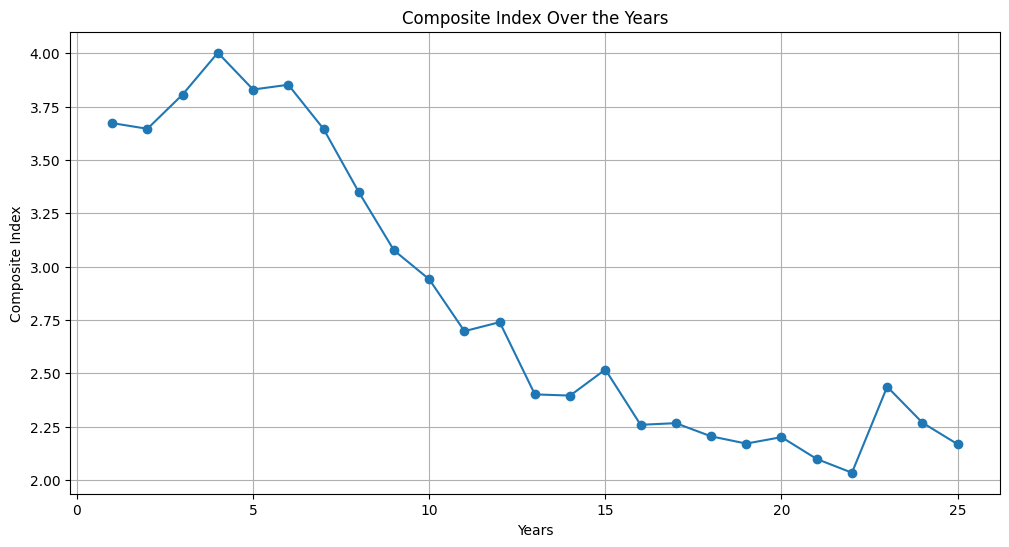

In [39]:
# Plotting the composite index over the years
plt.figure(figsize=(12, 6))
plt.plot(composite_index.index, composite_index['Composite Index'], marker='o', linestyle='-')
plt.xlabel('Years')
plt.ylabel('Composite Index')
plt.title('Composite Index Over the Years')
plt.grid(True)
plt.show()


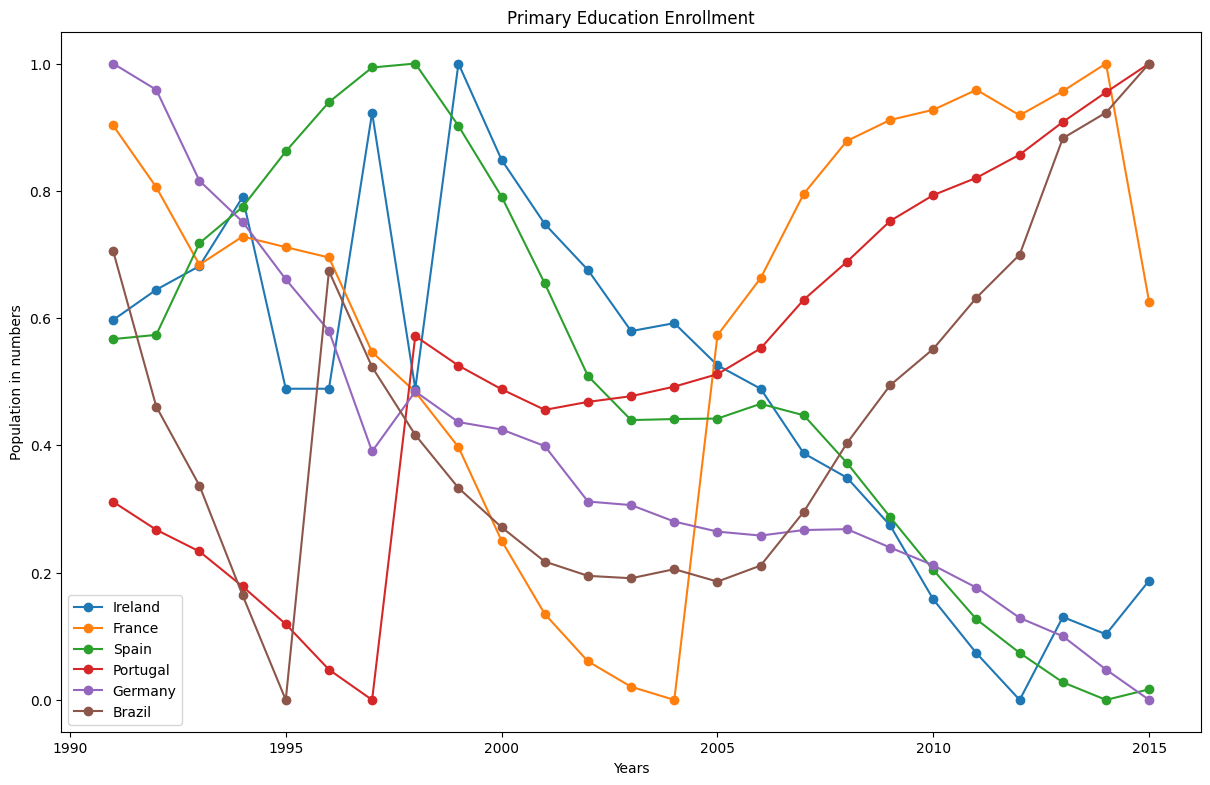

In [40]:
# Plotting sub-indices
plt.figure(figsize=(50, 20))

# Plotting primary education enrollment
plt.subplot(2, 3, 1)
for country in composite_index.columns[:-1]:
    plt.plot(primary_education_enrollment['Year'], primary_education_enrollment[country], marker='o', linestyle='-', label=country)
plt.xlabel('Years')
plt.ylabel('Population in numbers')
plt.title('Primary Education Enrollment')
plt.legend()


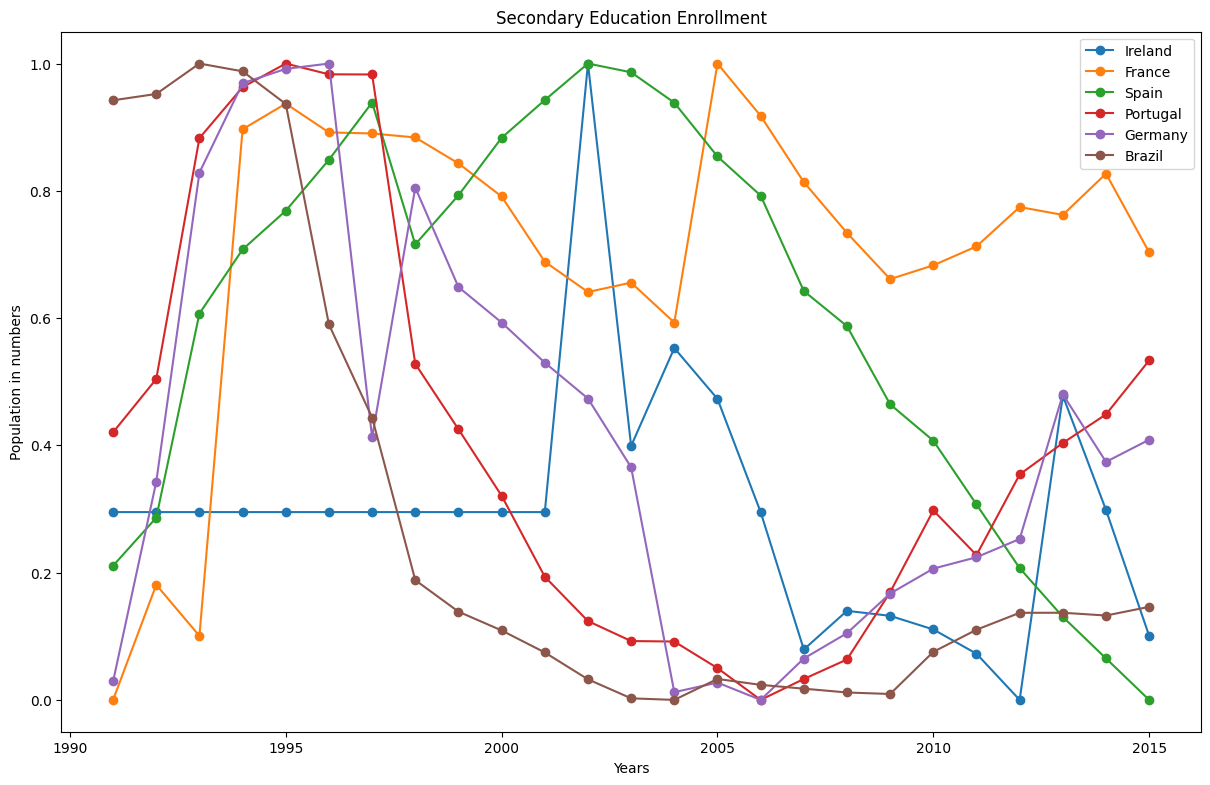

In [41]:
plt.figure(figsize=(50, 20))
# Plotting secondary education enrollment
plt.subplot(2, 3, 2)
for country in composite_index.columns[:-1]:
    plt.plot(secondary_education_enrollment['Year'], secondary_education_enrollment[country], marker='o', linestyle='-', label=country)
plt.xlabel('Years')
plt.ylabel('Population in numbers')
plt.title('Secondary Education Enrollment')
plt.legend()

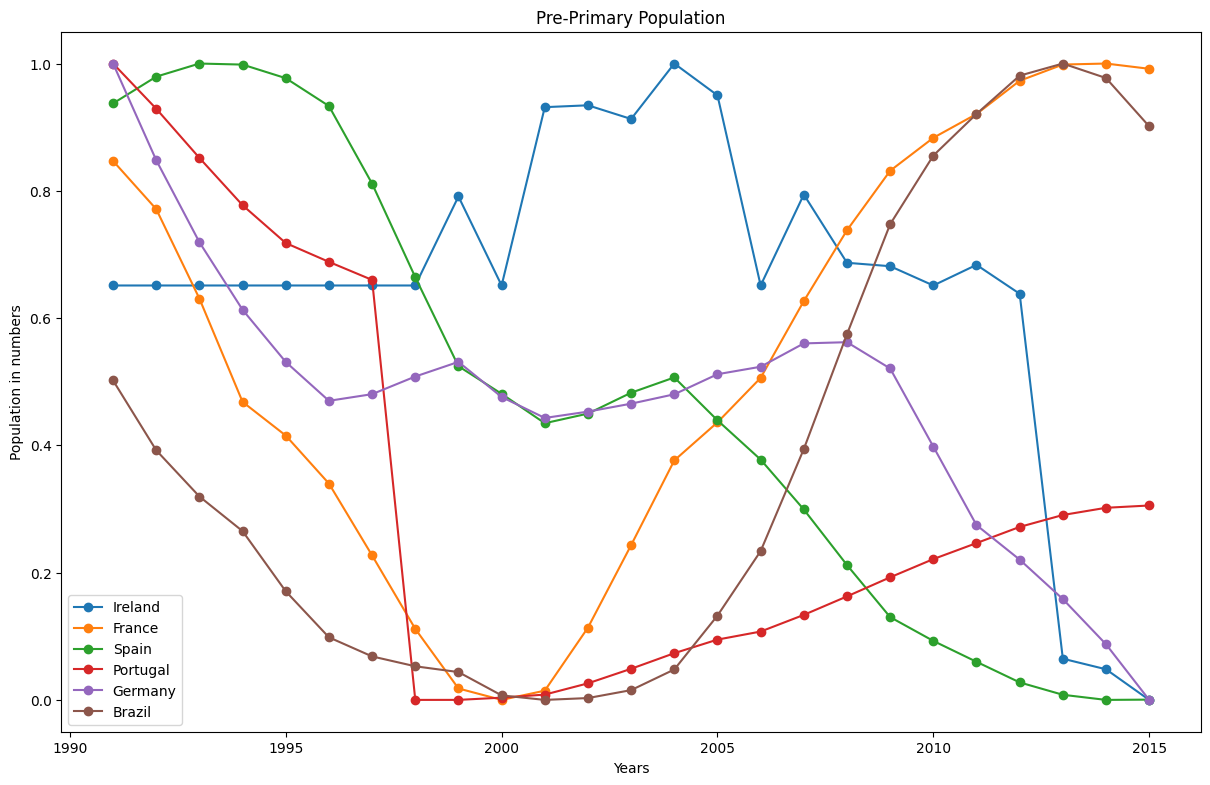

In [42]:
plt.figure(figsize=(50, 20))
# Plotting pre-primary population
plt.subplot(2, 3, 3)
for country in composite_index.columns[:-1]:
    plt.plot(pre_primary_population['Year'], pre_primary_population[country], marker='o', linestyle='-', label=country)
plt.xlabel('Years')
plt.ylabel('Population in numbers')
plt.title('Pre-Primary Population')
plt.legend()

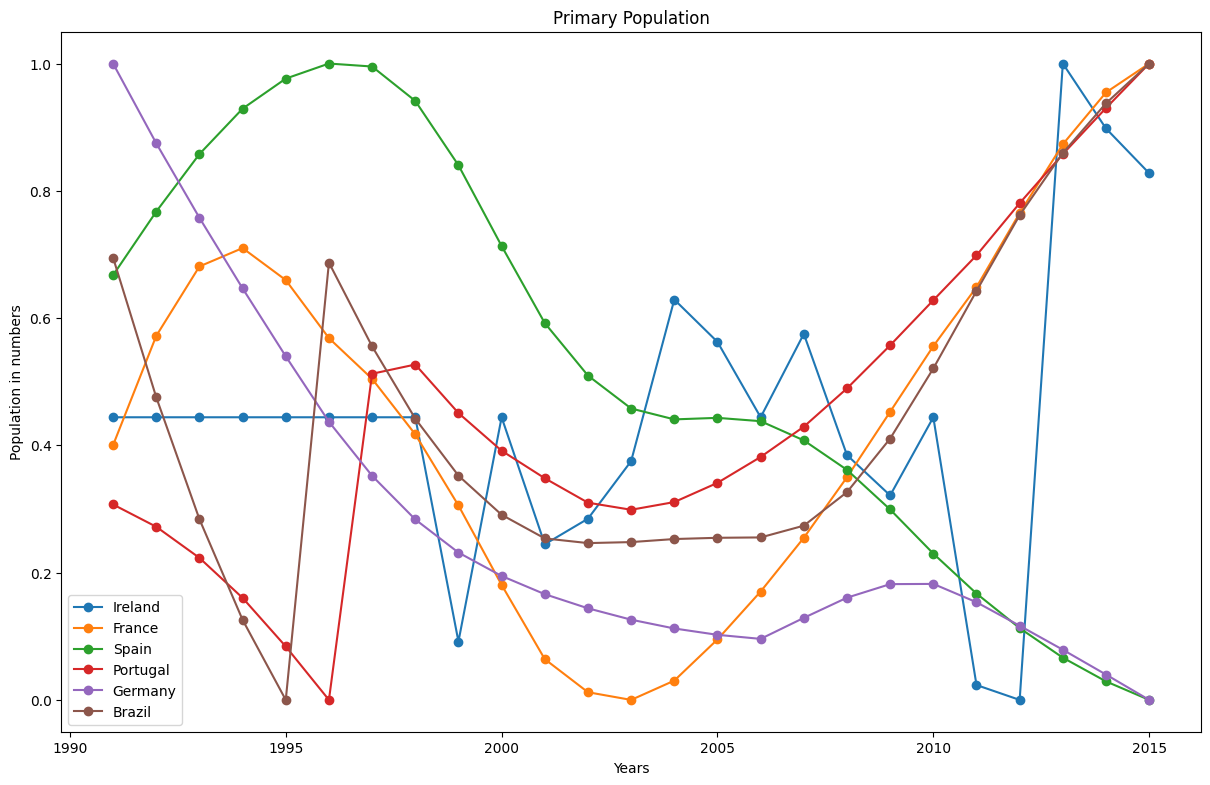

In [43]:
plt.figure(figsize=(50, 20))
# Plotting primary population
plt.subplot(2, 3, 4)
for country in composite_index.columns[:-1]:
    plt.plot(primary_population['Year'], primary_population[country], marker='o', linestyle='-', label=country)
plt.xlabel('Years')
plt.ylabel('Population in numbers')
plt.title('Primary Population')
plt.legend()

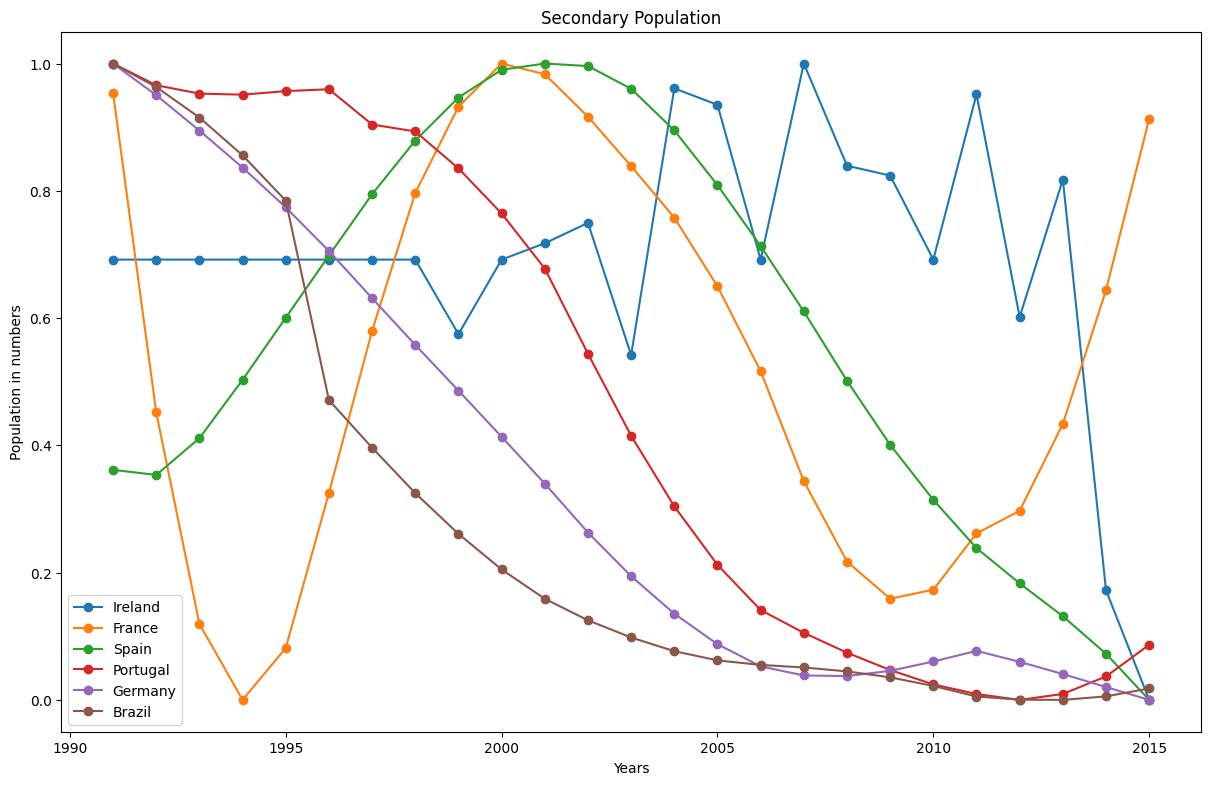

In [44]:
plt.figure(figsize=(50, 20))
# Plotting secondary population
plt.subplot(2, 3, 5)
for country in composite_index.columns[:-1]:
    plt.plot(secondary_population['Year'], secondary_population[country], marker='o', linestyle='-', label=country)
plt.xlabel('Years')
plt.ylabel('Population in numbers')
plt.title('Secondary Population')
plt.legend()

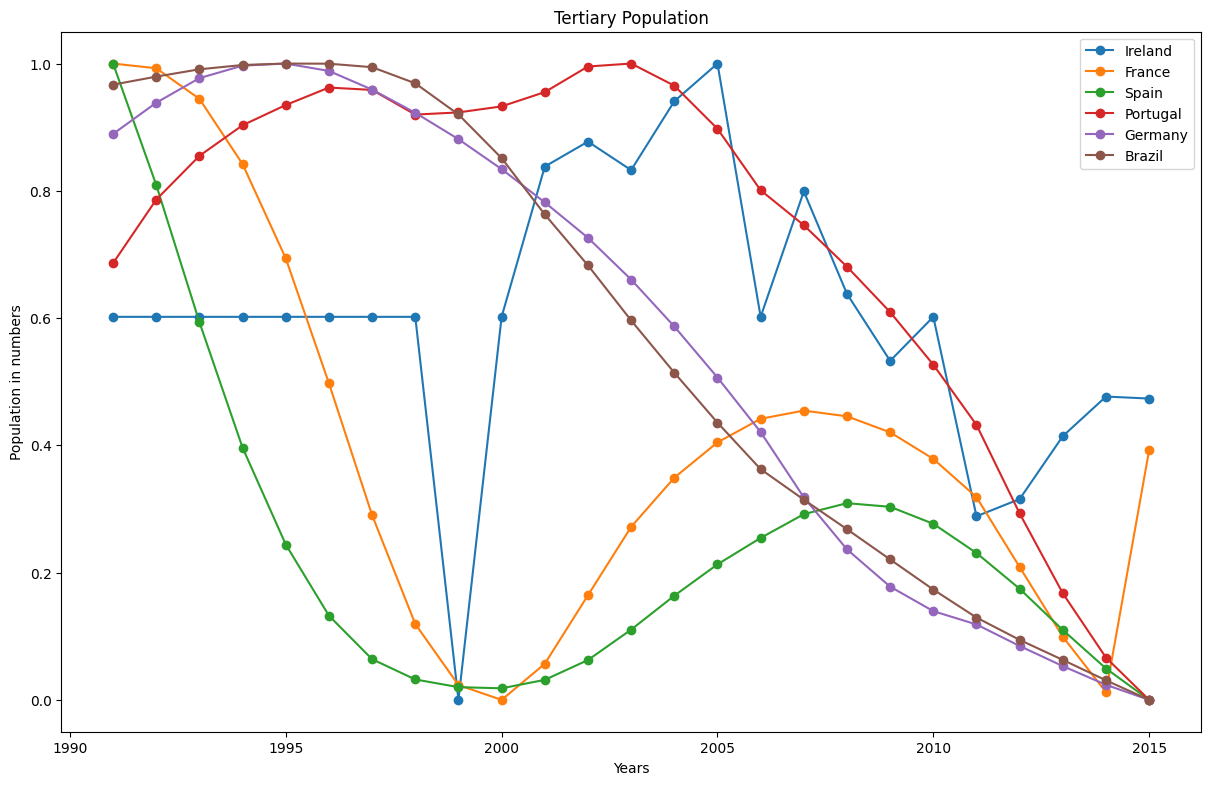

In [45]:
plt.figure(figsize=(50, 20))
# Plotting tertiary population
plt.subplot(2, 3, 6)
for country in composite_index.columns[:-1]:
    plt.plot(tertiary_population['Year'], tertiary_population[country], marker='o', linestyle='-', label=country)
plt.xlabel('Years')
plt.ylabel('Population in numbers')
plt.title('Tertiary Population')
plt.legend()